In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.formula.api as smf
import statsmodels.api as sm
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])
#plt.rcParams['figure.figsize'] = (15, 7)
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
from pylab import rcParams


In [24]:
conn_string = 'mysql://{user}:{password}@{host}:{port}/{db}'.format(
    user='root',
    password='P5mwahopkq8FKqnD',
    host='35.236.242.29',
    port=3306,
    db='sterncfe')
engine = create_engine(conn_string)

In [47]:
query = '''
SELECT*
FROM cfe
'''

df = pd.read_sql(query, con=engine)
df.replace('', np.nan, inplace=True)
df.dropna(axis=0, inplace=True)
df

,semester,course_num,class_name,prof_name,students_registered,num_responses,expected_grade,preparedness,communication,motivation,overall_instructor,challenging,demanding,interest,overall_course,recommendation_score
0,2007 FALL,C10.0001.001,PRIN OF FINANCIAL ACCTG,BARTOV,70,42,3.6,6.1,5.6,5.1,5.7,5.3,5.5,5.1,5.6,5.4
1,2007 FALL,C10.0001.002,PRIN OF FINANCIAL ACCTG,KLEIN,70,31,3.5,7.0,6.7,6.3,6.7,6.4,6.1,5.8,6.3,6.2
2,2007 FALL,C10.0001.003,PRIN OF FINANCIAL ACCTG,KLEIN,69,30,3.6,6.3,6.1,5.5,6.1,5.1,5.8,5.0,5.7,5.7
3,2007 FALL,C10.0001.004,PRIN OF FINANCIAL ACCTG,HIPSCHER,70,39,3.4,6.6,6.3,6.3,6.4,6.3,6.0,5.6,6.0,6.0
4,2007 FALL,C10.0001.005,PRIN OF FINANCIAL ACCTG,CHOI,70,38,3.4,6.8,6.6,6.4,6.7,6.6,6.1,5.7,6.4,6.3
5,2007 FALL,C10.0001.006,PRIN OF FINANCIAL ACCTG,CARRIZOSA,43,26,3.6,6.4,6.2,5.8,6.2,5.7,5.7,4.9,5.6,5.5
6,2007 FALL,C10.0001.007,PRIN OF FINANCIAL ACCTG,STEWART,58,38,3.7,6.8,6.8,6.5,6.8,6.4,6.1,5.9,6.4,6.4
7,2007 FALL,C10.0002.002,PRIN OF MANAGERIAL ACCTG,MAINDIRATTA,48,22,3.2,6.4,5.2,4.6,5.3,5.4,5.4,4.5,4.7,4.3
8,2007 FALL,C10.0002.004,PRIN OF MANAGERIAL ACCTG,MAINDIRATTA,47,16,3.6,6.5,5.9,4.9,5.8,5.2,5.4,4.3,5.2,4.8
9,2007 FALL,C10.0002.006,PRIN OF MANAGERIAL ACCTG,DONTOH,46,19,3.5,4.5,4.8,4.8,4.6,4.8,4.8,4.1,4.4,4.5


In [48]:
df = df[~df['class_name'].str.contains('PROFESSIONAL RESP. & LEADERSHI')]

In [49]:
df

,semester,course_num,class_name,prof_name,students_registered,num_responses,expected_grade,preparedness,communication,motivation,overall_instructor,challenging,demanding,interest,overall_course,recommendation_score
0,2007 FALL,C10.0001.001,PRIN OF FINANCIAL ACCTG,BARTOV,70,42,3.6,6.1,5.6,5.1,5.7,5.3,5.5,5.1,5.6,5.4
1,2007 FALL,C10.0001.002,PRIN OF FINANCIAL ACCTG,KLEIN,70,31,3.5,7.0,6.7,6.3,6.7,6.4,6.1,5.8,6.3,6.2
2,2007 FALL,C10.0001.003,PRIN OF FINANCIAL ACCTG,KLEIN,69,30,3.6,6.3,6.1,5.5,6.1,5.1,5.8,5.0,5.7,5.7
3,2007 FALL,C10.0001.004,PRIN OF FINANCIAL ACCTG,HIPSCHER,70,39,3.4,6.6,6.3,6.3,6.4,6.3,6.0,5.6,6.0,6.0
4,2007 FALL,C10.0001.005,PRIN OF FINANCIAL ACCTG,CHOI,70,38,3.4,6.8,6.6,6.4,6.7,6.6,6.1,5.7,6.4,6.3
5,2007 FALL,C10.0001.006,PRIN OF FINANCIAL ACCTG,CARRIZOSA,43,26,3.6,6.4,6.2,5.8,6.2,5.7,5.7,4.9,5.6,5.5
6,2007 FALL,C10.0001.007,PRIN OF FINANCIAL ACCTG,STEWART,58,38,3.7,6.8,6.8,6.5,6.8,6.4,6.1,5.9,6.4,6.4
7,2007 FALL,C10.0002.002,PRIN OF MANAGERIAL ACCTG,MAINDIRATTA,48,22,3.2,6.4,5.2,4.6,5.3,5.4,5.4,4.5,4.7,4.3
8,2007 FALL,C10.0002.004,PRIN OF MANAGERIAL ACCTG,MAINDIRATTA,47,16,3.6,6.5,5.9,4.9,5.8,5.2,5.4,4.3,5.2,4.8
9,2007 FALL,C10.0002.006,PRIN OF MANAGERIAL ACCTG,DONTOH,46,19,3.5,4.5,4.8,4.8,4.6,4.8,4.8,4.1,4.4,4.5


In [27]:
pivot = df.pivot_table(index = ['prof_name', 'course_num'])
pivot

challenging  communication  demanding  \
prof_name     course_num                                                
ABRANTES-METZ C70.0015.001         5.000000       4.100000   4.800000   
              ECON-UB.0221.001     5.300000       4.900000   4.200000   
ADAMOPOULOS   INFO-UB.0057.001     6.600000       6.800000   4.100000   
AGRAWAL       C15.0007.001         6.400000       6.825000   4.825000   
              C15.0007.002         6.500000       6.800000   5.000000   
              C15.0007.003         6.200000       6.500000   4.600000   
              FINC-UB.0007.001     6.425000       6.675000   4.500000   
              FINC-UB.0007.003     6.450000       6.675000   4.650000   
              FINC-UB.0007.004     6.375000       6.700000   4.625000   
AHARONSON     C50.0001.002         3.800000       3.500000   5.600000   
              C50.0001.003         3.400000       3.100000   4.600000   
              C50.0001.004         5.600000       5.800000   5.500000   
              C50.0001.005         4.300000       4.000000   5.700000   
              C50.0004.001         4.300000       4.500000   4.800000   
              C50.0004.002         4.050000       4.400000   5.000000   
ALLES         C10.0002.001         3.000000       2.200000   4.100000   
              C10.0002.002         3.600000       2.100000   4.500000   
ALTER         C55.0001.009         5.600000       6.400000   4.500000   
              C55.0001.010         5.800000       6.600000   4.700000   
              C55.0001.011         5.200000       6.700000   4.300000   
              MKTG-UB.0001.002     5.000000       6.500000   4.700000   
              MKTG-UB.0001.003     5.150000       6.600000   4.700000   
              MKTG-UB.0001.004     5.275000       6.625000   4.500000   
              MKTG-UB.0001.005     5.500000       6.675000   4.400000   
              MKTG-UB.0001.006     5.900000       6.800000   4.800000   
AMIHUD        C15.0050.001         6.200000       5.400000   5.000000   
              FINC-UB.0050.001     6.542857       5.814286   5.228571   
APPELBAUM     SOIM-UB.0125.006     6.500000       6.200000   5.800000   
ARAL          C20.0001.001         5.400000       6.550000   5.350000   
              C20.0001.002         5.650000       6.800000   5.500000   
...                                     ...            ...        ...   
YUDKOVITZ     MKTG-UB.0040.004     5.800000       6.600000   4.200000   
              MKTG-UB.0040.005     5.600000       6.600000   4.100000   
              MKTG-UB.0040.006     5.000000       6.300000   4.600000   
ZACHARIAS     OPMG-UB.0001.005     5.500000       6.100000   4.000000   
ZALMANSON     INFO-UB.0001.001     5.500000       5.700000   4.900000   
              INFO-UB.0001.002     5.300000       5.200000   5.000000   
ZAROWIN       ACCT-UB.0021.001     5.533333       5.900000   4.850000   
              ACCT-UB.0033.001     5.540000       6.060000   4.460000   
              C10.0021.001         6.100000       6.133333   5.366667   
              C10.0021.002         6.233333       6.100000   5.600000   
ZBARACKI      C50.0001.006         6.800000       6.300000   5.900000   
              C50.0001.008         6.600000       5.900000   6.100000   
ZHANG         ACCT-UB.0022.001     5.500000       6.600000   4.200000   
              C60.0001.003         5.100000       5.600000   5.600000   
              C60.0001.004         4.900000       5.400000   5.600000   
              C70.0007.001         6.300000       6.200000   5.550000   
              INFO-UB.0057.001     4.800000       4.300000   4.600000   
              MULT-UB.0016.001     6.125000       5.600000   4.325000   
ZIN           BPEP-UB.0002.001     5.400000       5.250000   4.150000   
              C22.0103.003         5.500000       5.100000   4.500000   
              C22.0103.004         5.300000       5.400000   4.700000   
              C22.0103.005         5.400000       5.100000   4.500000   
              C22

In [4]:
#df['response_rate'] = df['num_responses'] / df['students_registered']

#df.iloc[:,4:]
df

,semester,course_num,class_name,prof_name,students_registered,num_responses,expected_grade,preparedness,communication,motivation,overall_instructor,challenging,demanding,interest,overall_course,recommendation_score
0,2007 FALL,C10.0001.001,PRIN OF FINANCIAL ACCTG,BARTOV,70,42,3.6,6.1,5.6,5.1,5.7,5.3,5.5,5.1,5.6,5.4
1,2007 FALL,C10.0001.002,PRIN OF FINANCIAL ACCTG,KLEIN,70,31,3.5,7.0,6.7,6.3,6.7,6.4,6.1,5.8,6.3,6.2
2,2007 FALL,C10.0001.003,PRIN OF FINANCIAL ACCTG,KLEIN,69,30,3.6,6.3,6.1,5.5,6.1,5.1,5.8,5.0,5.7,5.7
3,2007 FALL,C10.0001.004,PRIN OF FINANCIAL ACCTG,HIPSCHER,70,39,3.4,6.6,6.3,6.3,6.4,6.3,6.0,5.6,6.0,6.0
4,2007 FALL,C10.0001.005,PRIN OF FINANCIAL ACCTG,CHOI,70,38,3.4,6.8,6.6,6.4,6.7,6.6,6.1,5.7,6.4,6.3
5,2007 FALL,C10.0001.006,PRIN OF FINANCIAL ACCTG,CARRIZOSA,43,26,3.6,6.4,6.2,5.8,6.2,5.7,5.7,4.9,5.6,5.5
6,2007 FALL,C10.0001.007,PRIN OF FINANCIAL ACCTG,STEWART,58,38,3.7,6.8,6.8,6.5,6.8,6.4,6.1,5.9,6.4,6.4
7,2007 FALL,C10.0002.002,PRIN OF MANAGERIAL ACCTG,MAINDIRATTA,48,22,3.2,6.4,5.2,4.6,5.3,5.4,5.4,4.5,4.7,4.3
8,2007 FALL,C10.0002.004,PRIN OF MANAGERIAL ACCTG,MAINDIRATTA,47,16,3.6,6.5,5.9,4.9,5.8,5.2,5.4,4.3,5.2,4.8
9,2007 FALL,C10.0002.006,PRIN OF MANAGERIAL ACCTG,DONTOH,46,19,3.5,4.5,4.8,4.8,4.6,4.8,4.8,4.1,4.4,4.5


In [5]:
#Professor Response Rate
pivot_response = df.pivot_table(index = 'prof_name',
                      values = ['response_rate','num_responses'],
                      aggfunc = {'response_rate':np.mean,
                                 'num_responses':sum}).sort_values(by='response_rate', ascending=False)
pivot_response

KeyError: 'response_rate'

In [6]:
df['grade/challenging'] = df['expected_grade'] / df['challenging']
df['grade/demanding'] = df['expected_grade'] / df['demanding']
df['raw_overall_instructor']=df['overall_instructor']*df['num_responses']
df['raw_challenging']=df['challenging']*df['num_responses']
df['raw_demanding']=df['demanding']*df['num_responses']
df

,semester,course_num,class_name,prof_name,students_registered,num_responses,expected_grade,preparedness,communication,motivation,...,challenging,demanding,interest,overall_course,recommendation_score,grade/challenging,grade/demanding,raw_overall_instructor,raw_challenging,raw_demanding
0,2007 FALL,C10.0001.001,PRIN OF FINANCIAL ACCTG,BARTOV,70,42,3.6,6.1,5.6,5.1,...,5.3,5.5,5.1,5.6,5.4,0.679245,0.654545,239.4,222.6,231.0
1,2007 FALL,C10.0001.002,PRIN OF FINANCIAL ACCTG,KLEIN,70,31,3.5,7.0,6.7,6.3,...,6.4,6.1,5.8,6.3,6.2,0.546875,0.573770,207.7,198.4,189.1
2,2007 FALL,C10.0001.003,PRIN OF FINANCIAL ACCTG,KLEIN,69,30,3.6,6.3,6.1,5.5,...,5.1,5.8,5.0,5.7,5.7,0.705882,0.620690,183.0,153.0,174.0
3,2007 FALL,C10.0001.004,PRIN OF FINANCIAL ACCTG,HIPSCHER,70,39,3.4,6.6,6.3,6.3,...,6.3,6.0,5.6,6.0,6.0,0.539683,0.566667,249.6,245.7,234.0
4,2007 FALL,C10.0001.005,PRIN OF FINANCIAL ACCTG,CHOI,70,38,3.4,6.8,6.6,6.4,...,6.6,6.1,5.7,6.4,6.3,0.515152,0.557377,254.6,250.8,231.8
5,2007 FALL,C10.0001.006,PRIN OF FINANCIAL ACCTG,CARRIZOSA,43,26,3.6,6.4,6.2,5.8,...,5.7,5.7,4.9,5.6,5.5,0.631579,0.631579,161.2,148.2,148.2
6,2007 FALL,C10.0001.007,PRIN OF FINANCIAL ACCTG,STEWART,58,38,3.7,6.8,6.8,6.5,...,6.4,6.1,5.9,6.4,6.4,0.578125,0.606557,258.4,243.2,231.8
7,2007 FALL,C10.0002.002,PRIN OF MANAGERIAL ACCTG,MAINDIRATTA,48,22,3.2,6.4,5.2,4.6,...,5.4,5.4,4.5,4.7,4.3,0.592593,0.592593,116.6,118.8,118.8
8,2007 FALL,C10.0002.004,PRIN OF MANAGERIAL ACCTG,MAINDIRATTA,47,16,3.6,6.5,5.9,4.9,...,5.2,5.4,4.3,5.2,4.8,0.692308,0.666667,92.8,83.2,86.4
9,2007 FALL,C10.0002.006,PRIN OF MANAGERIAL ACCTG,DONTOH,46,19,3.5,4.5,4.8,4.8,...,4.8,4.8,4.1,4.4,4.5,0.729167,0.729167,87.4,91.2,91.2


#Average by semester
pivot = pd.pivot_table(data = df,
                      index = 'semester',
                      values = ['num_responses','raw_overall_instructor','raw_challenging','raw_demanding'],
                      aggfunc = sum)
df1 = pd.DataFrame(pivot)
df1['average_overall_instructor'] = df1['raw_overall_instructor']/df1['num_responses']
df1['average_demanding'] = df1['raw_demanding']/df1['num_responses']
df1['average_challenging'] = df1['raw_challenging']/df1['num_responses']
df1

In [85]:
##Average ratings by semester
query = '''
    SELECT*
    FROM cfe
    '''
    
df = pd.read_sql(query, con=engine)
df.replace('', np.nan, inplace=True)
df.dropna(axis=0, inplace=True)
df['response_rate'] = df['num_responses'] / df['students_registered']
df['grade_challenging'] = df['expected_grade'] / df['challenging']
df['grade_demanding'] = df['expected_grade'] / df['demanding']
df['raw_overall_instructor']=df['overall_instructor']*df['num_responses']
df['raw_challenging']=df['challenging']*df['num_responses']
df['raw_demanding']=df['demanding']*df['num_responses']
    
pivot = pd.pivot_table(data = df,
                      index = 'semester',
                      values = ['num_responses','raw_overall_instructor','raw_challenging','raw_demanding'],
                      aggfunc = sum)
df_ratings_by_sem = pd.DataFrame(pivot)
df_ratings_by_sem['average_overall_instructor'] = df_ratings_by_sem['raw_overall_instructor']/df_ratings_by_sem['num_responses']
df_ratings_by_sem['average_demanding'] = df_ratings_by_sem['raw_demanding']/df_ratings_by_sem['num_responses']
df_ratings_by_sem['average_challenging'] = df_ratings_by_sem['raw_challenging']/df_ratings_by_sem['num_responses']
df_ratings_by_sem=df_ratings_by_sem.drop(columns=['raw_challenging','raw_demanding','raw_overall_instructor'])
df_ratings_by_sem

,num_responses,average_overall_instructor,average_demanding,average_challenging
semester,,,,
2007 FALL,3537,5.902742,5.523551,5.616483
2008 FALL,4576,5.592242,5.418597,5.454152
2008 SPRING,4323,5.715267,5.476914,5.526440
2009 FALL,4874,5.940254,4.878950,5.734653
2009 SPRING,5170,5.838395,5.247427,5.616963
2010 FALL,5761,5.882694,4.928814,5.726436
2010 SPRING,5754,5.914129,5.009541,5.694230
2011 FALL,5484,5.954358,4.910686,5.726204
2011 SPRING,5550,5.919063,4.979369,5.710667


In [86]:
len(df)

4831

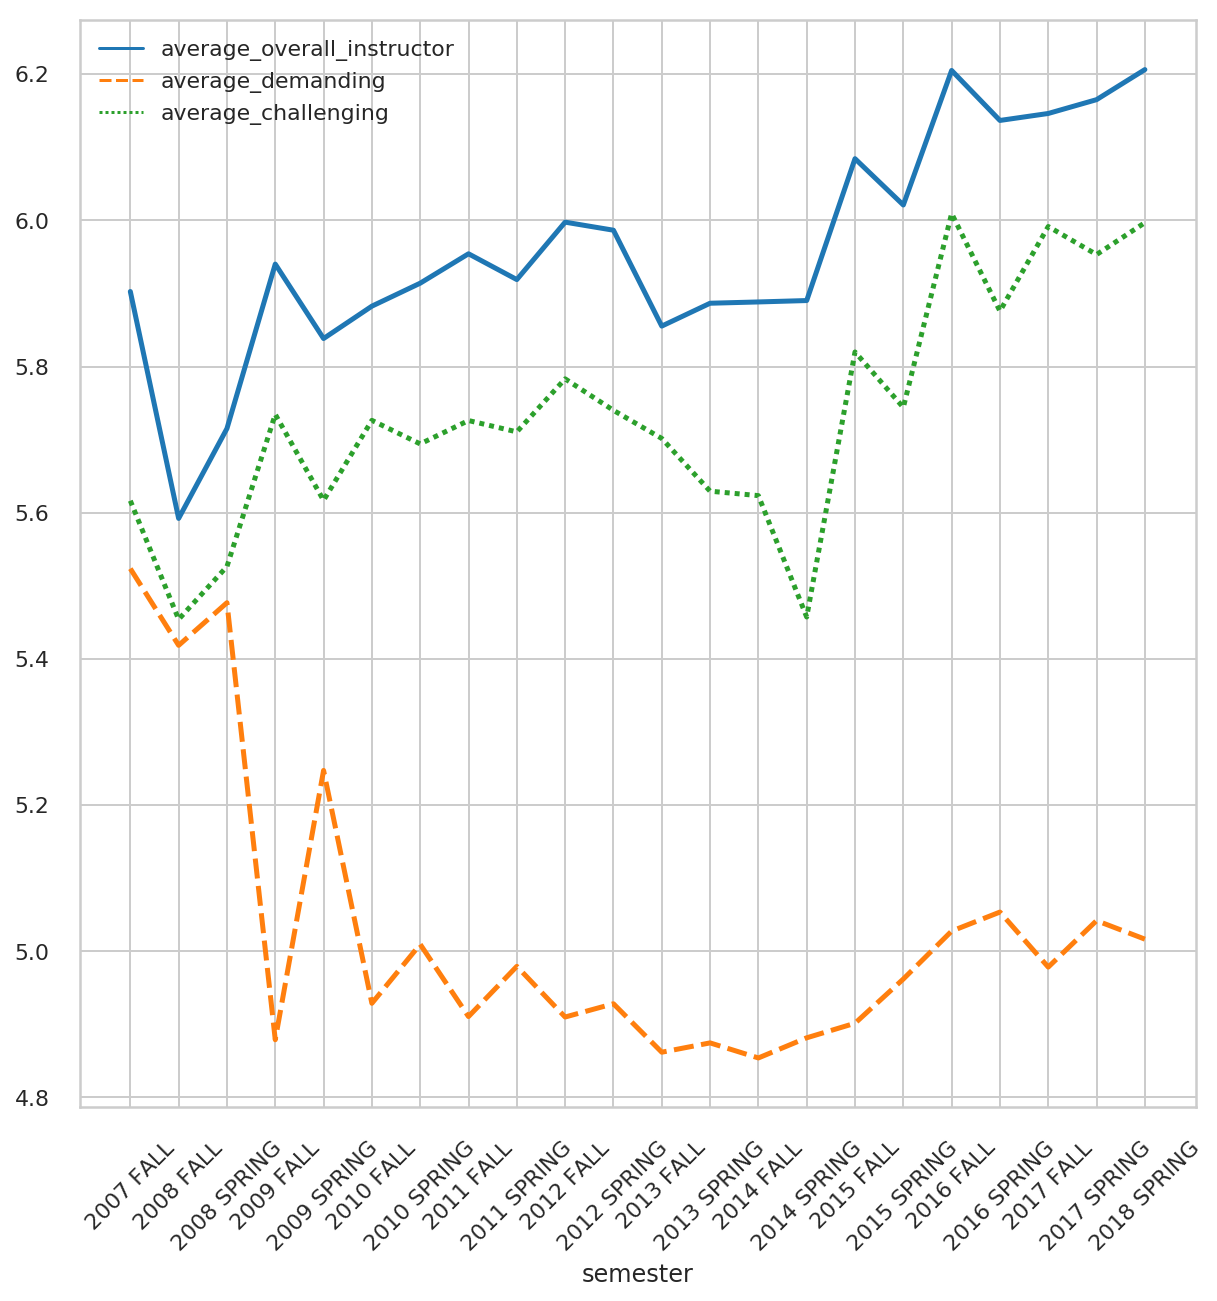

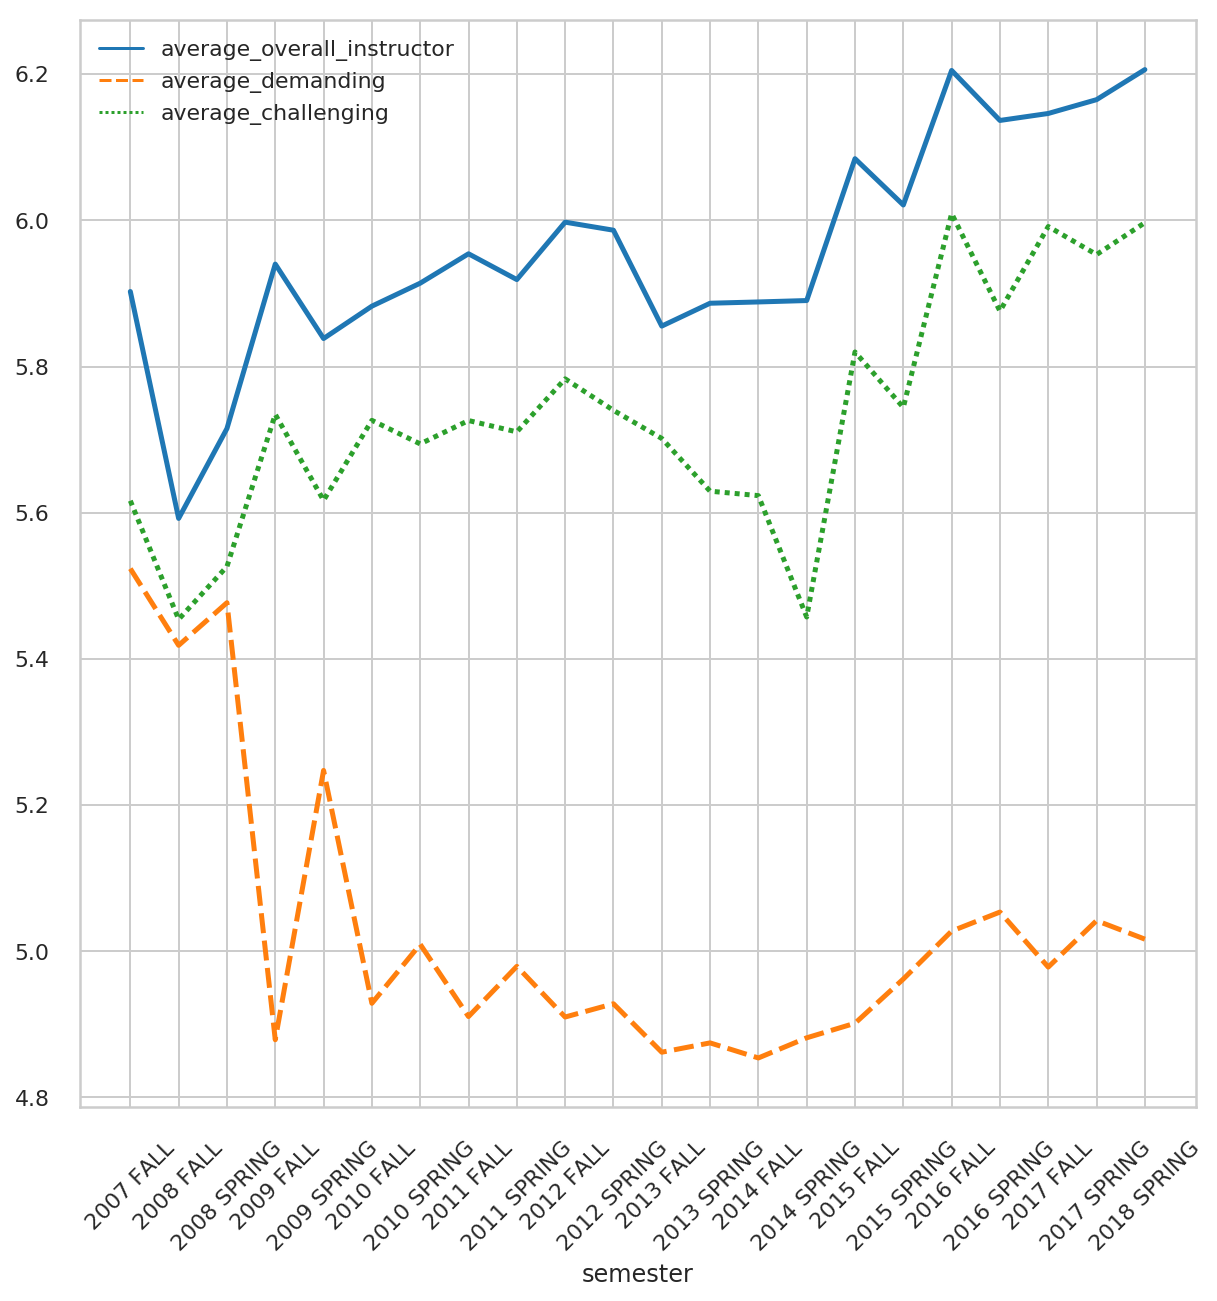

In [39]:
#df_ratings_by_sem[['average_overall_instructor','average_demanding','average_challenging']].plot(x=index)
trend=sns.lineplot(data=df_ratings_by_sem[['average_overall_instructor','average_demanding','average_challenging']],palette="tab10", linewidth=2.5)
plt.xticks(rotation=45)
plt.rcParams['figure.figsize'] = (10, 10)
#plt.figure(figsize=(10,30))
fig = trend.get_figure()
fig

In [84]:
df = df.drop(df[df.expected_grade > 4].index)
len(df)

3952

In [68]:
#Average by professor
pivot2 = pd.pivot_table(data = df,
                      index = 'prof_name',
                      values = ['num_responses','raw_overall_instructor','raw_challenging','raw_demanding'],
                      aggfunc = sum)
df_prof = pd.DataFrame(pivot2)
df_prof['average_overall_instructor'] = df_prof['raw_overall_instructor']/df_prof['num_responses']
df_prof['average_demanding'] = df_prof['raw_demanding']/df_prof['num_responses']
df_prof['average_challenging'] = df_prof['raw_challenging']/df_prof['num_responses']
df_prof = df_prof.sort_values(by='average_overall_instructor', ascending=False).drop(df_prof[df_prof.num_responses < 20].index)
df_prof=df_prof.drop(columns=['raw_challenging','raw_demanding','raw_overall_instructor'])
df_prof[-5:].sort_values(['average_overall_instructor'], ascending=True)
#df_prof[:5]

,num_responses,average_overall_instructor,average_demanding,average_challenging
prof_name,,,,
STOLOVE,27,2.000000,4.300000,3.100000
ALLES,77,2.053247,4.312987,3.319481
JAIN,21,2.200000,3.400000,4.300000
DELONG,20,2.500000,3.300000,2.600000
VON WYSS,22,2.550000,5.327273,3.786364


In [81]:
panos = (df['prof_name'] == "IPEIROTIS")
df_panos = df[panos]
#df_panos
result = smf.ols(formula='overall_instructor~expected_grade+challenging+demanding', data=df_panos).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     overall_instructor   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     8.569
Date:                Fri, 07 Dec 2018   Prob (F-statistic):           0.000952
Time:                        05:02:19   Log-Likelihood:                0.53919
No. Observations:                  22   AIC:                             6.922
Df Residuals:                      18   BIC:                             11.29
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8400      1.529      0.

In [82]:
df_panos

,semester,course_num,class_name,prof_name,students_registered,num_responses,expected_grade,preparedness,communication,motivation,...,demanding,interest,overall_course,recommendation_score,response_rate,grade_challenging,grade_demanding,raw_overall_instructor,raw_challenging,raw_demanding
48,2007 FALL,C20.0001.002,INFO TECH IN BUS &,IPEIROTIS,50,30,3.8,6.7,6.3,5.9,...,5.4,5.6,6.0,6.0,0.600000,0.666667,0.703704,192.0,171.0,162.0
51,2007 FALL,C20.0001.005,INFO TECH IN BUS &,IPEIROTIS,50,29,3.8,6.7,6.4,6.2,...,5.9,6.0,6.2,6.2,0.580000,0.666667,0.644068,191.4,165.3,171.1
359,2008 FALL,C20.0001.002,INFO TECH IN BUS &,IPEIROTIS,50,36,3.9,6.7,6.2,6.0,...,5.6,5.9,6.1,6.2,0.720000,0.709091,0.696429,230.4,198.0,201.6
360,2008 FALL,C20.0001.003,INFO TECH IN BUS &,IPEIROTIS,49,31,3.7,6.7,6.3,5.7,...,5.5,5.5,5.9,5.7,0.632653,0.698113,0.672727,198.4,164.3,170.5
724,2009 FALL,C20.0001.004,INFO TECH IN BUS &,IPEIROTIS,53,35,3.3,6.4,6.2,5.6,...,5.1,4.8,5.3,5.0,0.660377,0.647059,0.647059,213.5,178.5,178.5
725,2009 FALL,C20.0001.005,INFO TECH IN BUS &,IPEIROTIS,53,37,3.8,6.6,6.0,5.6,...,5.1,4.9,5.7,5.6,0.698113,0.730769,0.745098,236.8,192.4,188.7
1115,2010 FALL,C20.0001.002,INFO TECH IN BUS &,IPEIROTIS,45,32,3.6,6.2,5.3,4.4,...,5.2,4.4,4.7,4.3,0.711111,0.765957,0.692308,166.4,150.4,166.4
1116,2010 FALL,C20.0001.003,INFO TECH IN BUS &,IPEIROTIS,49,36,3.5,6.4,5.6,4.8,...,5.6,4.3,4.7,4.2,0.734694,0.700000,0.625000,198.0,180.0,201.6
1527,2011 FALL,INFO-UB.0001.004,INFO TECH IN BUS & SOCIETY,IPEIROTIS,51,41,3.6,6.6,6.2,5.6,...,4.6,5.3,5.6,5.4,0.803922,0.679245,0.782609,246.0,217.3,188.6
1528,2011 FALL,INFO-UB.0001.005,INFO TECH IN BUS & SOCIETY,IPEIROTIS,54,36,3.6,6.5,5.9,5.6,...,5.2,5.5,5.7,5.7,0.666667,0.642857,0.692308,219.6,201.6,187.2


In [71]:
df_prof = df_prof.reset_index()
panos = (df_prof['prof_name'] == "IPEIROTIS")
df_panos = df_prof[panos]
#result = smf.ols(formula='average_overall_instructor~average_demanding+average_challenging', data=df_panos).fit()
#print(result.summary())
#df_panos

,level_0,index,prof_name,num_responses,average_overall_instructor,average_demanding,average_challenging
138,138,138,IPEIROTIS,624,6.234455,5.08141,5.74359


In [50]:
df_prof.sort_values(['average_challenging'], ascending=False).head(10)

,num_responses,average_overall_instructor,average_demanding,average_challenging
prof_name,,,,
SOMERSTEIN,31,6.919355,6.661290,6.887097
VENKATESWARAN,25,6.528000,5.000000,6.880000
PLUTA,233,6.807725,6.633047,6.850215
BLOUNT-LYON,61,6.668852,6.540984,6.829508
DAMODARAN,388,6.723969,5.549485,6.776031
MELTON,189,6.584127,6.510582,6.738624
ZBARACKI,40,6.360000,5.970000,6.730000
LOBEL,165,6.658182,4.915758,6.709697
TUCKMAN,29,6.700000,4.800000,6.700000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


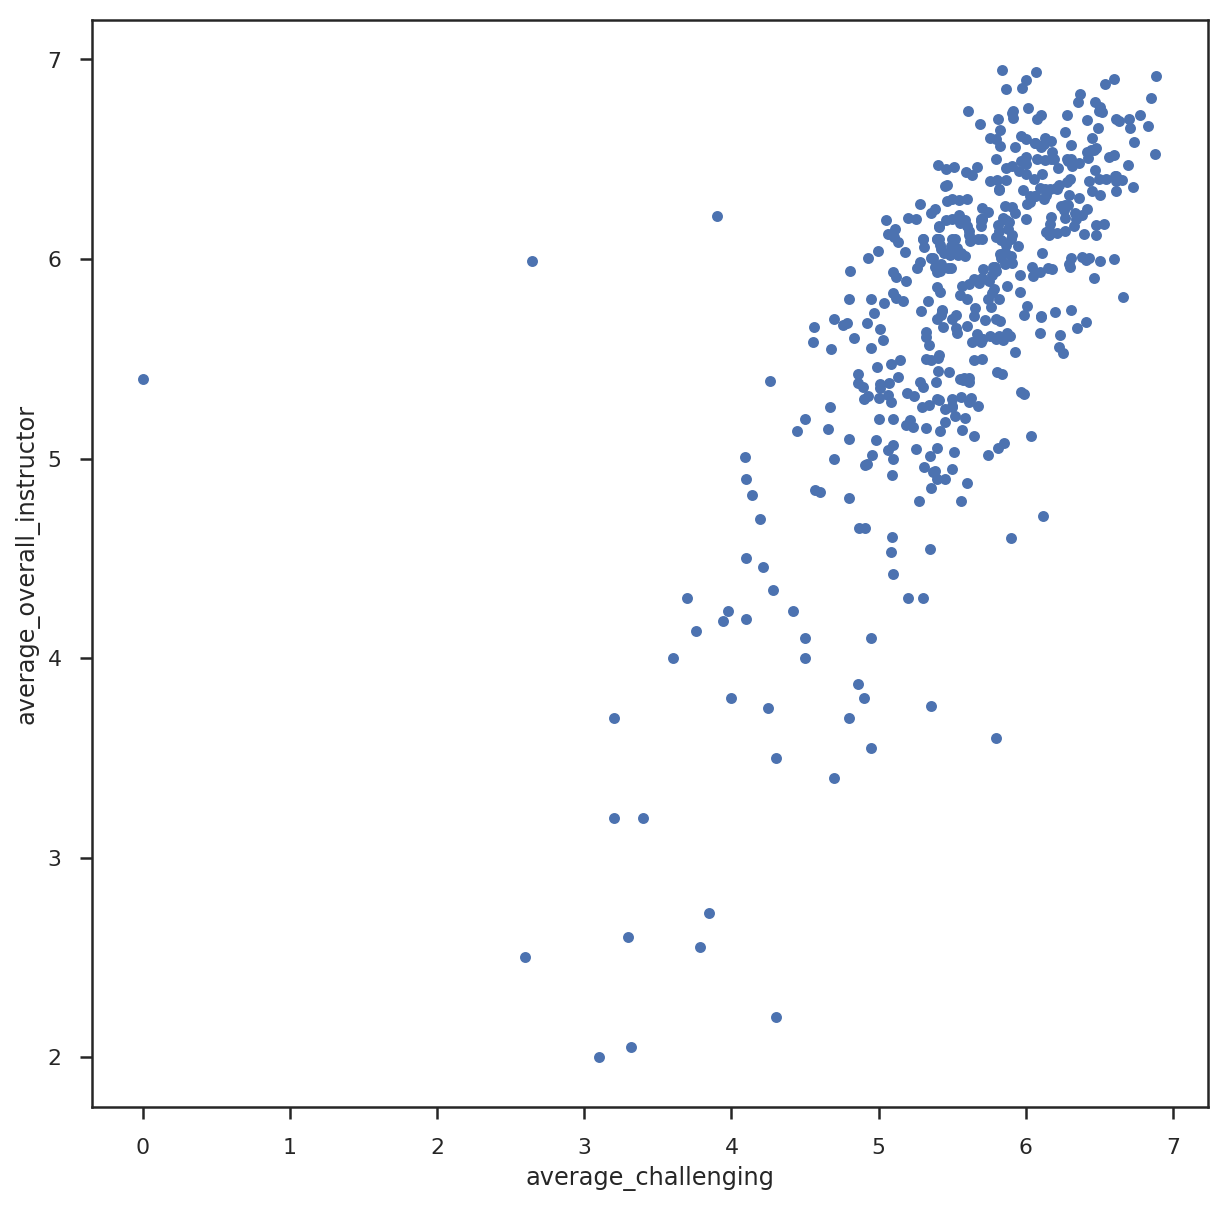

In [47]:
df_prof_plot = df_prof.drop(columns=['num_responses'])
#df_prof_plot.sample(frac=0.02).plot(kind='barh')
df_prof_plot.plot(kind='scatter', x = 'average_challenging', y = 'average_overall_instructor')

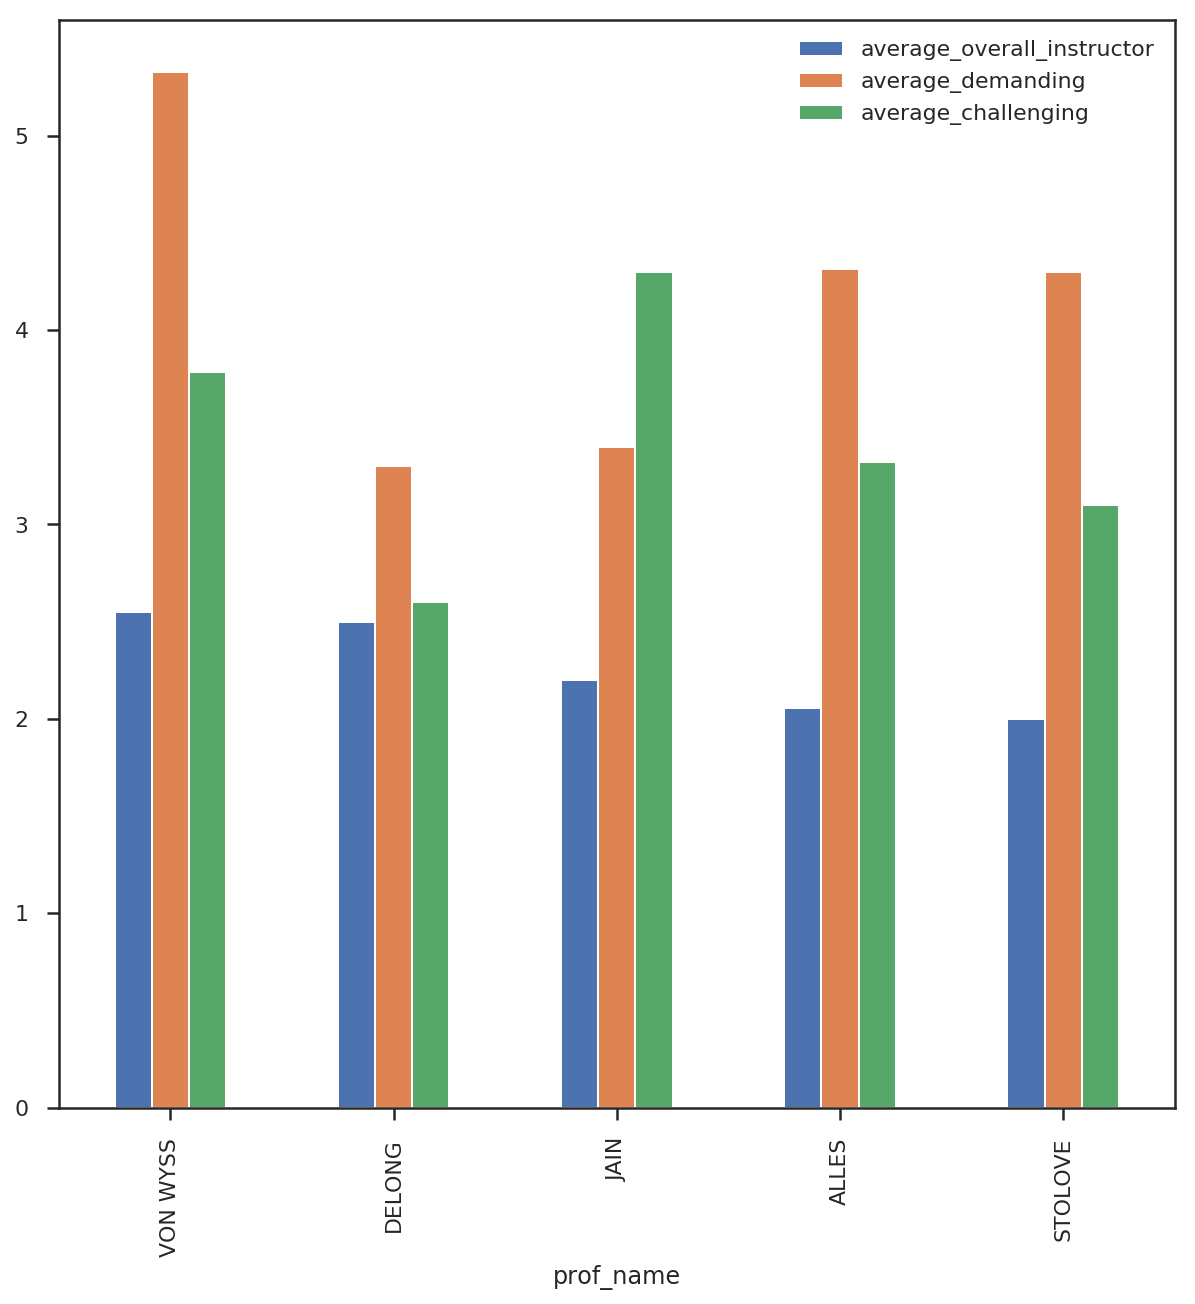

In [55]:
df_prof_plot[-5:].plot(kind='bar')

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


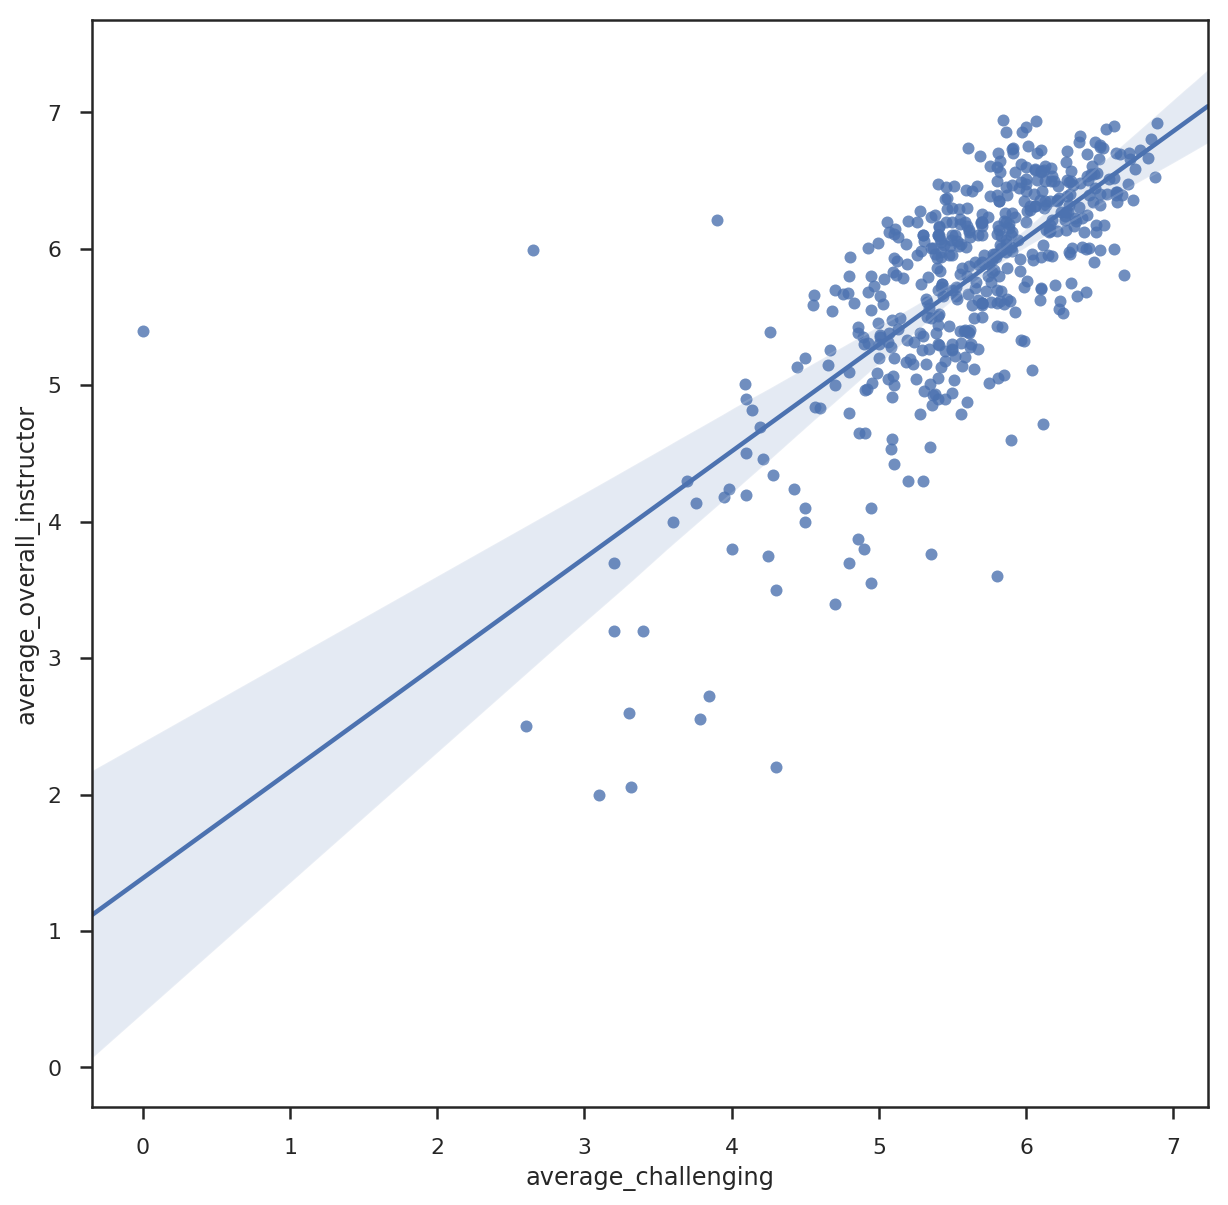

In [51]:
ax = sns.regplot(x = 'average_challenging', y = 'average_overall_instructor', data=df_prof)

In [46]:
result = smf.ols(formula='average_overall_instructor~average_demanding+average_challenging+num_responses', data=df_prof).fit()
print(result.summary())

                                OLS Regression Results                                
Dep. Variable:     average_overall_instructor   R-squared:                       0.509
Model:                                    OLS   Adj. R-squared:                  0.506
Method:                         Least Squares   F-statistic:                     166.7
Date:                        Fri, 07 Dec 2018   Prob (F-statistic):           4.14e-74
Time:                                03:30:29   Log-Likelihood:                -416.44
No. Observations:                         486   AIC:                             840.9
Df Residuals:                             482   BIC:                             857.6
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


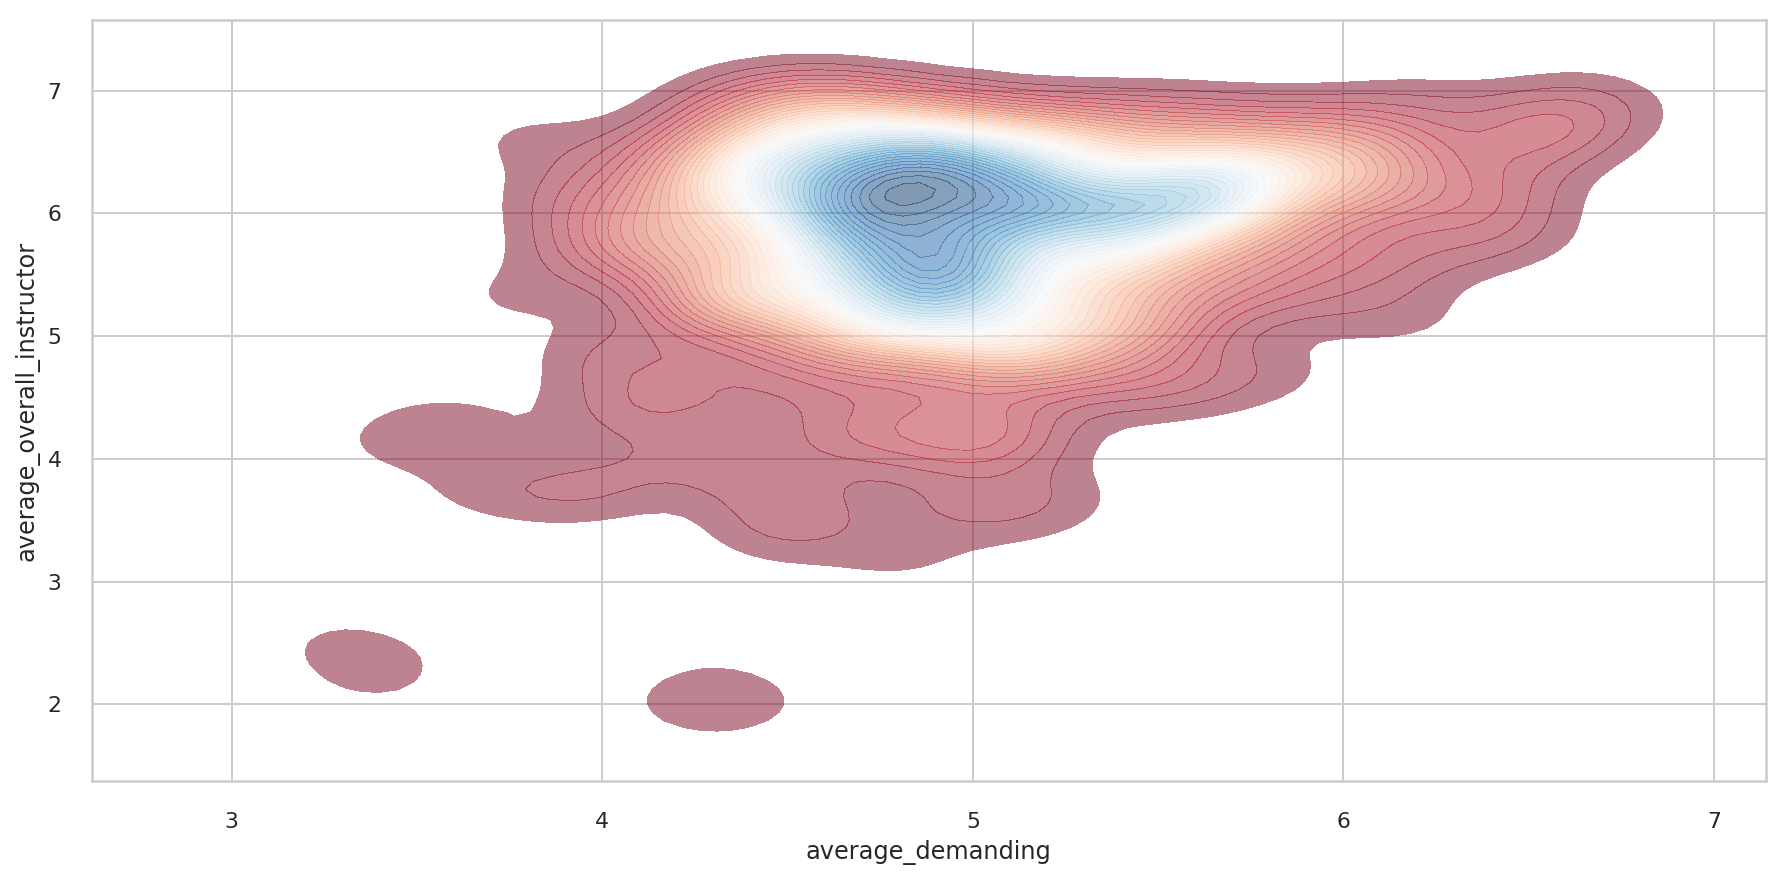

In [113]:
sns.kdeplot(
    df_prof['average_demanding'],
    df_prof['average_overall_instructor'],
    gridsize=100,  # controls the resolution
    cmap=plt.cm.RdBu,#rainbow,  # color scheme
    shade=True, # whether to have a density plot (True), or just the contours (False)
    alpha=0.5,
    shade_lowest=False,
    n_levels=50,  # How many contours/levels to have
)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


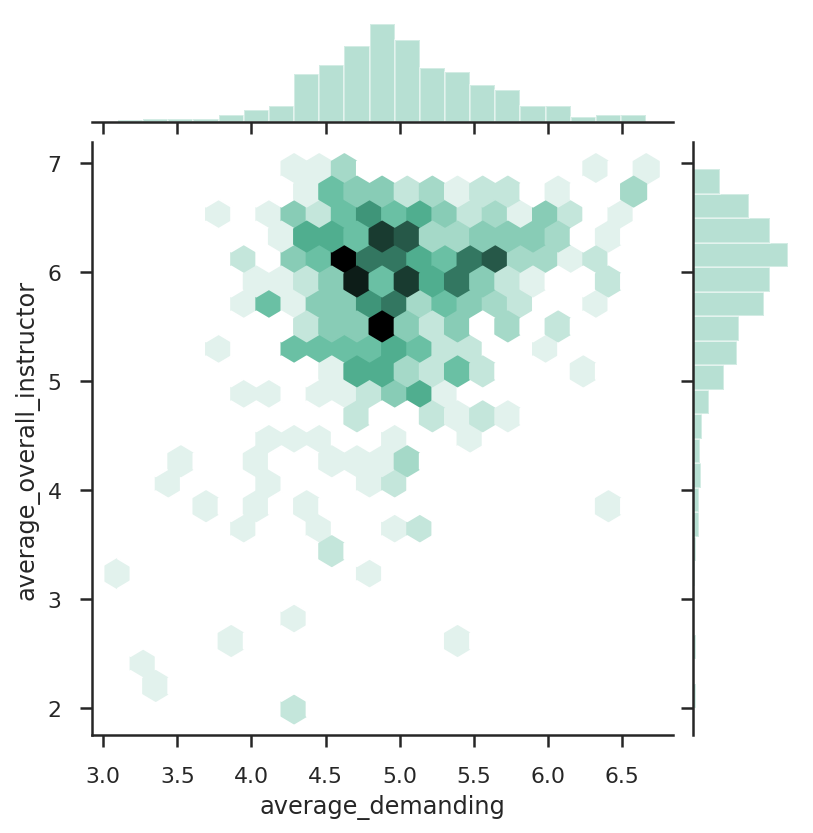

In [40]:
sns.set(style="ticks")


x = df_prof['average_demanding']
y = df_prof['average_overall_instructor']

fig = sns.jointplot(x, y, kind="hex", color="#4CB391")

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


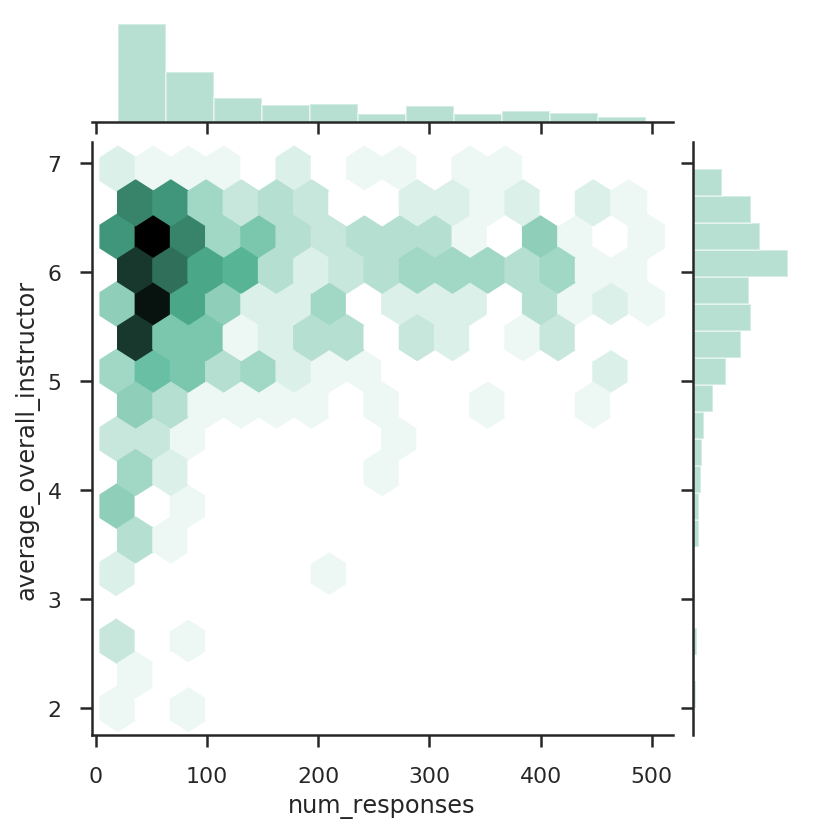

In [58]:
df_jointplot = df_prof[df_prof.num_responses < 500]
fig = sns.jointplot(x='num_responses', y='average_overall_instructor', kind="hex", color="#4CB391", data=df_jointplot)

In [41]:
fig

In [62]:
##ratings by course
df['raw_grade']=df['expected_grade']*df['num_responses']
pivot_course= pd.pivot_table(data = df,
                      index = 'class_name',
                      values = ['num_responses','raw_overall_instructor','raw_challenging','raw_demanding','raw_grade'],
                      aggfunc = sum)
df_course = pd.DataFrame(pivot_course)
df_course['average_overall_instructor'] = df_course['raw_overall_instructor']/df_course['num_responses']
df_course['average_demanding'] = df_course['raw_demanding']/df_course['num_responses']
df_course['average_challenging'] = df_course['raw_challenging']/df_course['num_responses']
df_course['average_grade']=df_course['raw_grade']/df_course['num_responses']
df_course = df_course.drop(df_course[df_course.num_responses < 30].index).drop(columns=['raw_challenging','raw_demanding','raw_overall_instructor','raw_grade'],index=['BUSINESS & ITS PUBLICS:','BUSINESS & ITS PUBLICS: DISCOU','BUSINESS & ITS PUBLICS','PROFESSIONAL RESP. & LEADERSHI'])
df_course['easiness_number']=df_course['average_grade']/(df_course['average_demanding']+df_course['average_challenging'])
df_course2 = df_course[['easiness_number','average_overall_instructor']].sort_values(by='easiness_number', ascending=False)
df_course2.sort_values(['easiness_number'], ascending=False).head(10)

,easiness_number,average_overall_instructor
class_name,,
INVESTMENT TOPICS,0.463415,5.200000
DATA ANALYTICS IN DIGITAL MARK,0.454735,4.873913
SOCIAL MEDIA STRATEGY,0.439943,5.519008
MICROFINANCE,0.430233,4.800000
FILM & TV DISTRIBUTION &,0.418900,4.475000
TECHNOLOGY'S IMACT ON,0.418469,5.245833
SPORTS MARKETING,0.417317,5.923864
THE BUSINESS OF BROADWAY,0.416086,5.426108
LEISURE MARKETING,0.415160,6.381481


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


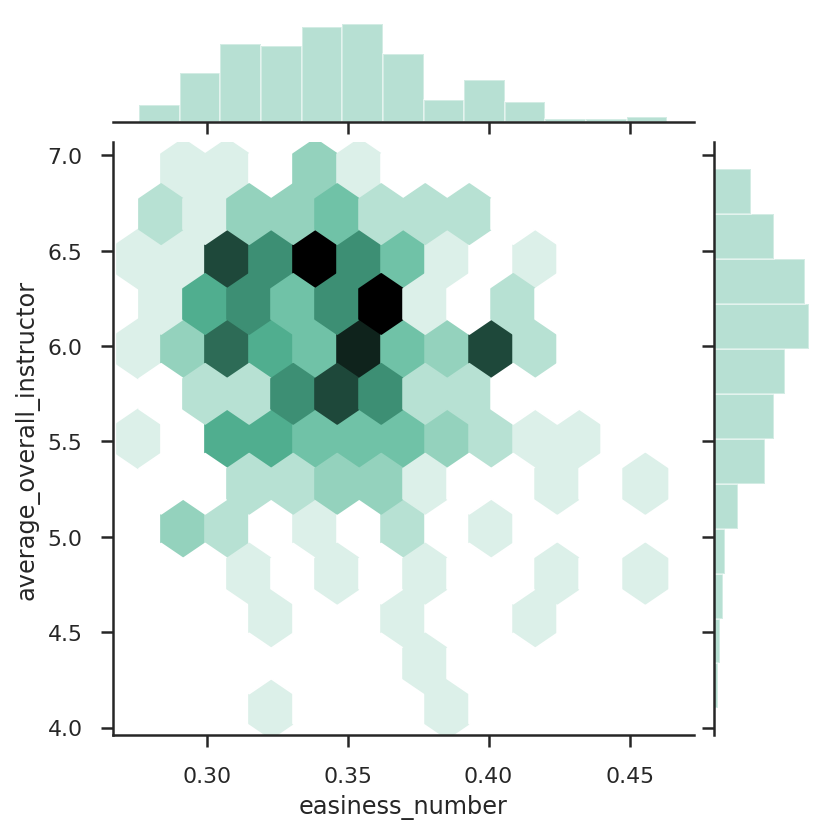

In [61]:
fig = sns.jointplot(x='easiness_number', y='average_overall_instructor', kind="hex", color="#4CB391", data=df_course2)

In [85]:
df_course.sort_values(by='easiness_number', ascending=False)

,num_responses,average_overall_instructor,average_demanding,average_challenging,average_grade,easiness_number
class_name,,,,,,
INVESTMENT TOPICS,37,5.200000,3.500000,4.700000,3.800000,0.463415
DATA ANALYTICS IN DIGITAL MARK,46,4.873913,3.673913,4.682609,3.800000,0.454735
SOCIAL MEDIA STRATEGY,121,5.519008,4.161983,4.507438,3.814050,0.439943
MICROFINANCE,43,4.800000,3.800000,4.800000,3.700000,0.430233
FILM & TV DISTRIBUTION &,40,4.475000,4.362500,4.500000,3.712500,0.418900
TECHNOLOGY'S IMACT ON,72,5.245833,4.002778,4.600000,3.600000,0.418469
SPORTS MARKETING,440,5.923864,4.262727,4.971591,3.853636,0.417317
THE BUSINESS OF BROADWAY,203,5.426108,4.325616,4.861576,3.822660,0.416086
LEISURE MARKETING,270,6.381481,4.201852,5.199259,3.902963,0.415160


In [4]:
query='''
select*
from cfe
'''

df=pd.read_sql(query, con=engine)

In [12]:
    df['raw_overall_instructor']=df['overall_instructor']*df['num_responses']
    df['raw_grade']=df['expected_grade']*df['num_responses']
    df['raw_challenging']=df['challenging']*df['num_responses']
    df['raw_demanding']=df['demanding']*df['num_responses']
    df['raw_communication']=df['communication']*df['num_responses']
    df['raw_motivation']=df['motivation']*df['num_responses']
    df['raw_interest']=df['interest']*df['num_responses']
    df['raw_preparedness']=df['preparedness']*df['num_responses']
    
    pivot2 = pd.pivot_table(data = df,
                          index = ['class_name','prof_name'],
                          values = ['num_responses','raw_overall_instructor','raw_grade','raw_demanding','raw_challenging',
                                    'raw_communication','raw_motivation','raw_interest','raw_preparedness'],
                          aggfunc = sum)
    df_prof = pd.DataFrame(pivot2)
    df_prof['average_overall_instructor'] = df_prof['raw_overall_instructor']/df_prof['num_responses']
    df_prof['average_grade'] = df_prof['raw_grade']/df_prof['num_responses']
    df_prof['average_demanding'] = df_prof['raw_demanding']/df_prof['num_responses']
    df_prof['average_challenging'] = df_prof['raw_challenging']/df_prof['num_responses']
    df_prof['average_communication'] = df_prof['raw_communication']/df_prof['num_responses']
    df_prof['average_motivation'] = df_prof['raw_motivation']/df_prof['num_responses']
    df_prof['average_interest'] = df_prof['raw_interest']/df_prof['num_responses']
    df_prof['average_preparedness'] = df_prof['raw_preparedness']/df_prof['num_responses']
    df_prof['grade_over_challenge'] = df_prof['average_grade']/df_prof['average_challenging']
    df_prof['grade_over_demanding'] = df_prof['average_grade']/df_prof['average_demanding']
    df_prof['overall_over_motivation'] = df_prof['average_overall_instructor']/df_prof['average_motivation']
    df_prof['overall_over_communication'] = df_prof['average_overall_instructor']/df_prof['average_communication']
    df_prof['overall_over_preparedness'] = df_prof['average_overall_instructor']/df_prof['average_preparedness']
    df_prof['overall_over_interest'] = df_prof['average_overall_instructor']/df_prof['average_interest']
    df_prof = df_prof.sort_values(by='average_overall_instructor', ascending=False)
    df_prof = df_prof.drop(columns=['raw_challenging','raw_demanding','raw_overall_instructor', 'raw_grade', 'raw_communication','raw_motivation','raw_interest','raw_preparedness'])

In [13]:
pivot=df_prof.pivot_table(index=['class_name', 'prof_name'])
search = pivot.index.get_level_values('class_name') == "CORPORATE FINANCE"
pivot[search]

average_challenging  \
class_name        prof_name                                
CORPORATE FINANCE AGRAWAL                       6.440470   
                  COMERTON-FORDE                5.500000   
                  DAMODARAN                     6.700000   
                  DE SOUZA                      6.163380   
                  GOMEZ LOPEZ                   5.500000   
                  JOHN                          4.990000   
                  LEE                           5.500000   
                  LIBERMAN                      5.953381   
                  MARCIANO                      6.224096   
                  PARLATORE SIRITTO             5.897106   
                  PETTINATO                     5.700000   
                  SCHNABL                       6.342017   
                  WURGLER                       5.699777   
                  YANNELIS                      5.295000   

                                     average_communication  average_demanding  \
class_name        prof_name                                                     
CORPORATE FINANCE AGRAWAL                         6.702089           4.665405   
                  COMERTON-FORDE                  5.358537           4.546341   
                  DAMODARAN                       6.800000           6.000000   
                  DE SOUZA                        6.253521           4.463380   
                  GOMEZ LOPEZ                     5.600000           4.500000   
                  JOHN                            4.390000           4.310000   
                  LEE                             5.200000           4.500000   
                  LIBERMAN                        6.526335           4.658007   
                  MARCIANO                        6.028313           5.042771   
                  PARLATORE SIRITTO               6.116077           4.643408   
                  PETTINATO                       6.100000           4.600000   
                  SCHNABL                         6.721008           4.724370   
                  WURGLER                         5.766592           4.539644   
                  YANNELIS                        5.040000           4.529000   

                                     average_grade  average_interest  \
class_name        prof_name                                            
CORPORATE FINANCE AGRAWAL                 3.555614          5.875065   
                  COMERTON-FORDE          3.600000          4.953659   
                  DAMODARAN               3.400000          6.400000   
                  DE SOUZA                3.590141          5.526761   
                  GOMEZ LOPEZ             3.600000          5.100000   
                  JOHN                    3.720000          4.920000   
                  LEE                     3.600000          5.000000   
                  LIBERMAN                3.582206          5.609253   
                  MARCIANO                3.535241          5.585241   
                  PARLATORE SIRITTO       3.554019          5.240836   
                  PETTINATO               3.600000          5.600000   
                  SCHNABL                 3.566387          5.903361   
                  WURGLER                 3.603118          5.275501   
                  YANNELIS                3.595000          4.968000   

                                     average_motivation  \
class_name        prof_name                               
CORPORATE FINANCE AGRAWAL                      6.479634   
                  COMERTON-FORDE               4.804878   
                  DAMODARAN                    6.500000   
                  DE SOUZA                     6.190141   
                  GOMEZ LOPEZ                  5.200000   
                  JOHN                         4.200000   
                  LEE                          4.900000   
                  LIBERMAN                     6.006406   
                  MARCIANO          

In [16]:
pivot_metric=df_prof.pivot_table(index=['class_name', 'prof_name'],
                             values=['average_overall_instructor','average_grade','average_demanding','average_challenging',
                                     'average_communication','average_motivation','average_interest','average_preparedness'])
metric_search = pivot_metric.index.get_level_values('class_name') == "CORPORATE FINANCE"

In [19]:
pivot_metric[metric_search]
winner_metric = pivot_metric[metric_search].sort_values(by="average_grade", ascending=False).head(1).index.get_level_values('prof_name')[0]

In [20]:
winner_metric

'JOHN'

In [22]:
column_order = ['average_overall_instructor','average_grade','average_demanding','average_challenging',
                                     'average_communication','average_motivation','average_interest','average_preparedness']
pivot_metric.reindex(column_order, axis=1)

average_overall_instructor  \
class_name                     prof_name                                   
ACCOUNTING & VALUATION IN EMT  KIM                              5.100000   
ACCOUNTING AND ANALYSIS IN PRA GODE                             6.700000   
ACCOUNTING FOR MERGERS,        BILDERSEE                        5.068493   
ACCOUNTING FOR MERGERS, ACQUIS BILDERSEE                        5.259259   
ACQUISITIONS, OTHER RESTRUCTUR BILDERSEE                        4.547143   
ACTUARIAL ASPECTS IN           BIGGS                            7.000000   
ADV MANAGERIAL ACCTG           DONTOH                           3.300000   
                               MAINDIRATTA                      5.200000   
ADVANCED CORP FINANCE          BHANOT                           5.337500   
                               GOMEZ LOPEZ                      5.428571   
                               HALOV                            5.874074   
                               LEE                              6.221084   
                               MARCIANO                         6.528788   
ADVANCED DECISION MODELS       ZHANG                            5.761765   
ADVANCED FINANCIAL ANALYSIS    OHLSON                           3.900000   
                               YEO                              6.758140   
ADVANCED FINANCIAL STATEMENT A YEO                              6.684848   
ADVANCED FUTURES AND OPTIONS   SUBRAHMANYAM                     6.800000   
ADVANCED LUXURY MARKETING      SERDARI                          6.900000   
ADVANCED MICROECONOMICS AND CO ASKER                            6.700000   
ADVANCED SOCIAL                MCGRATH                          5.675000   
ADVANCED TOPICS IN MODERN MACR FERRIERE                         5.700000   
                               SARGENT                          6.500000   
                               VELDKAMP                         6.494118   
                               VENKATESWARAN                    6.528000   
ADVERTISING                    COHEN                            6.675362   
                               JACOBY                           5.714286   
ADVERTISING MANAGEMENT         COHEN                            6.600000   
                               GREEN                            6.265447   
                               JACOBY                           5.242308   
...                                                                  ...   
THE EAST ASIAN ECONOMIES       LINCOLN                          6.202273   
THE ENTREPRENEURSHIP GAME      VARSAVSKY                        6.500000   
THE FINANCIAL SERVICE INDUSTRY FINCH                            6.400000   
                               MURPHY                           6.728894   
THE FINANCIAL SYSTEM           SCHOENHOLTZ                      6.410577   
                               SMITH                            5.994167   
                               WALTER                           5.642623   
                               ZIN                              4.711111   
THE GLOBALIZATION OF BUSINESS  GHEMAWAT                         6.080000   
                               POGORELOVA                       6.800000   
THE INDIAN CONTEXT: ECON       SRIVATSAN                        6.700000   
THE MIDDLE EAST: CULTURES, MAR NARAYANAN                        6.532432   
THE POLITICAL ECONOMY OF LATIN QUERUBIN                         6.500000   
TOPICS IN ENTREP FINC          OKUN                             5.219527   
                               SMITH                            5.500000   
TOPICS IN INVESTMENTS:         CARLSON                          6.100000   
TPCS IN EMERGING               DELONG                           2.500000   
                               GENDREAU                         3.700000   
                               SIEGEL                           6.700340   
TPCS IN EMERGING FINANCIAL MAR OCAMPO                           4.887500   
                  

In [28]:
query = '''
select*
from facial
'''

df = pd.read_sql(query, con=engine)
df

,businessperson,elder,name,smile,spokesperson,image_url
0,NaN,NaN,ABRANTES-METZ,0.599111,NaN,http://www.stern.nyu.edu/faculty/static/photos...
1,0.711054,NaN,ACHARYA,0.672121,NaN,http://www.stern.nyu.edu/faculty/static/photos...
2,0.504544,NaN,ADAMSON,0.524166,NaN,http://www.stern.nyu.edu/faculty/static/photos...
3,NaN,NaN,AGNELLO,NaN,NaN,http://www.stern.nyu.edu/faculty/static/images...
4,NaN,NaN,AHMAD,NaN,NaN,http://www.stern.nyu.edu/faculty/static/photos...
5,0.778010,0.725793,ALBANESE,NaN,0.542616,http://www.stern.nyu.edu/faculty/static/photos...
6,NaN,0.651358,ALLEN,NaN,NaN,http://www.stern.nyu.edu/faculty/static/photos...
7,NaN,NaN,ALTER,0.798504,NaN,http://www.stern.nyu.edu/faculty/static/photos...
8,NaN,NaN,ALTMAN,NaN,NaN,http://www.stern.nyu.edu/faculty/static/photos...
9,NaN,0.821531,ALTMAN,0.680531,NaN,http://www.stern.nyu.edu/faculty/static/photos...


In [46]:
names = df["name"].tolist()
index_list = []
for i in range(1,len(names)):
    if names[i] == names[(i-1)]:
        index_list.append(i)
        print(names[i])

ALTMAN
BRENNER
BROWN
BROWN
CHEN
COHEN
COHEN
COHEN
HANLON
JUNG
MARCIANO
RYAN
SMITH
SMITH
WALKER
WHITE


In [44]:
names[46]

'BRENNER'

In [ ]:
dup_list = ['BRENNER', 'BROWN', 'CHEN', 'COHEN', 'SMITH', 'WALKER']

In [62]:
query2 = '''
    select c.semester,c.prof_name, c.class_name, c.overall_course, c.expected_grade, c.communication, c.motivation, c.interest, c.challenging, c.demanding, c.recommendation_score, f.smile, f.elder, f.businessperson, f.spokesperson, f.image_url
    from cfe c inner join facial f on c.prof_name = f.name
    '''
regression_df = pd.read_sql(query2, con=engine)
regression_df = regression_df.fillna(0)
search_reg = (regression_df["class_name"] == "CORPORATE FINANCE")
    
    
#regression_cfe = smf.ols(formula='overall_instructor~expected_grade+challenging+demanding+communication+motivation+interest', data=regression_df[search_reg]).fit()
#print(regression_cfe.summary())
regression_df[search_reg]

,semester,prof_name,class_name,overall_course,expected_grade,communication,motivation,interest,challenging,demanding,recommendation_score,smile,elder,businessperson,spokesperson,image_url
444,2009 FALL,SCHNABL,CORPORATE FINANCE,6.4,3.4,6.7,6.4,6.1,6.6,4.9,6.4,0.000000,0.000000,0.804014,0.000000,http://www.stern.nyu.edu/faculty/static/photos...
445,2009 FALL,SCHNABL,CORPORATE FINANCE,6.4,3.6,6.7,6.4,6.0,6.3,4.8,6.4,0.000000,0.000000,0.804014,0.000000,http://www.stern.nyu.edu/faculty/static/photos...
713,2010 FALL,WURGLER,CORPORATE FINANCE,5.6,3.5,5.4,4.9,5.2,5.2,4.4,5.3,0.700430,0.520917,0.757825,0.000000,http://www.stern.nyu.edu/faculty/static/photos...
714,2010 FALL,WURGLER,CORPORATE FINANCE,5.4,3.6,5.2,4.8,5.3,5.7,4.6,5.2,0.700430,0.520917,0.757825,0.000000,http://www.stern.nyu.edu/faculty/static/photos...
715,2010 FALL,WURGLER,CORPORATE FINANCE,5.4,3.6,5.5,4.9,5.2,5.6,4.6,5.5,0.700430,0.520917,0.757825,0.000000,http://www.stern.nyu.edu/faculty/static/photos...
852,2011 SPRING,SCHNABL,CORPORATE FINANCE,6.3,3.6,6.8,6.5,5.7,6.2,4.6,6.2,0.000000,0.000000,0.804014,0.000000,http://www.stern.nyu.edu/faculty/static/photos...
1017,2011 FALL,JOHN,CORPORATE FINANCE,5.0,3.9,4.3,4.2,5.1,4.9,4.4,4.9,0.000000,0.752019,0.788307,0.655455,http://www.stern.nyu.edu/faculty/static/photos...
1018,2011 FALL,WURGLER,CORPORATE FINANCE,5.3,3.7,5.4,4.8,4.9,5.4,4.6,5.2,0.700430,0.520917,0.757825,0.000000,http://www.stern.nyu.edu/faculty/static/photos...
1019,2011 FALL,WURGLER,CORPORATE FINANCE,5.4,3.5,5.5,4.9,5.1,5.6,4.5,5.3,0.700430,0.520917,0.757825,0.000000,http://www.stern.nyu.edu/faculty/static/photos...
1020,2011 FALL,WURGLER,CORPORATE FINANCE,5.3,3.5,5.4,4.6,4.9,5.3,4.5,5.2,0.700430,0.520917,0.757825,0.000000,http://www.stern.nyu.edu/faculty/static/photos...


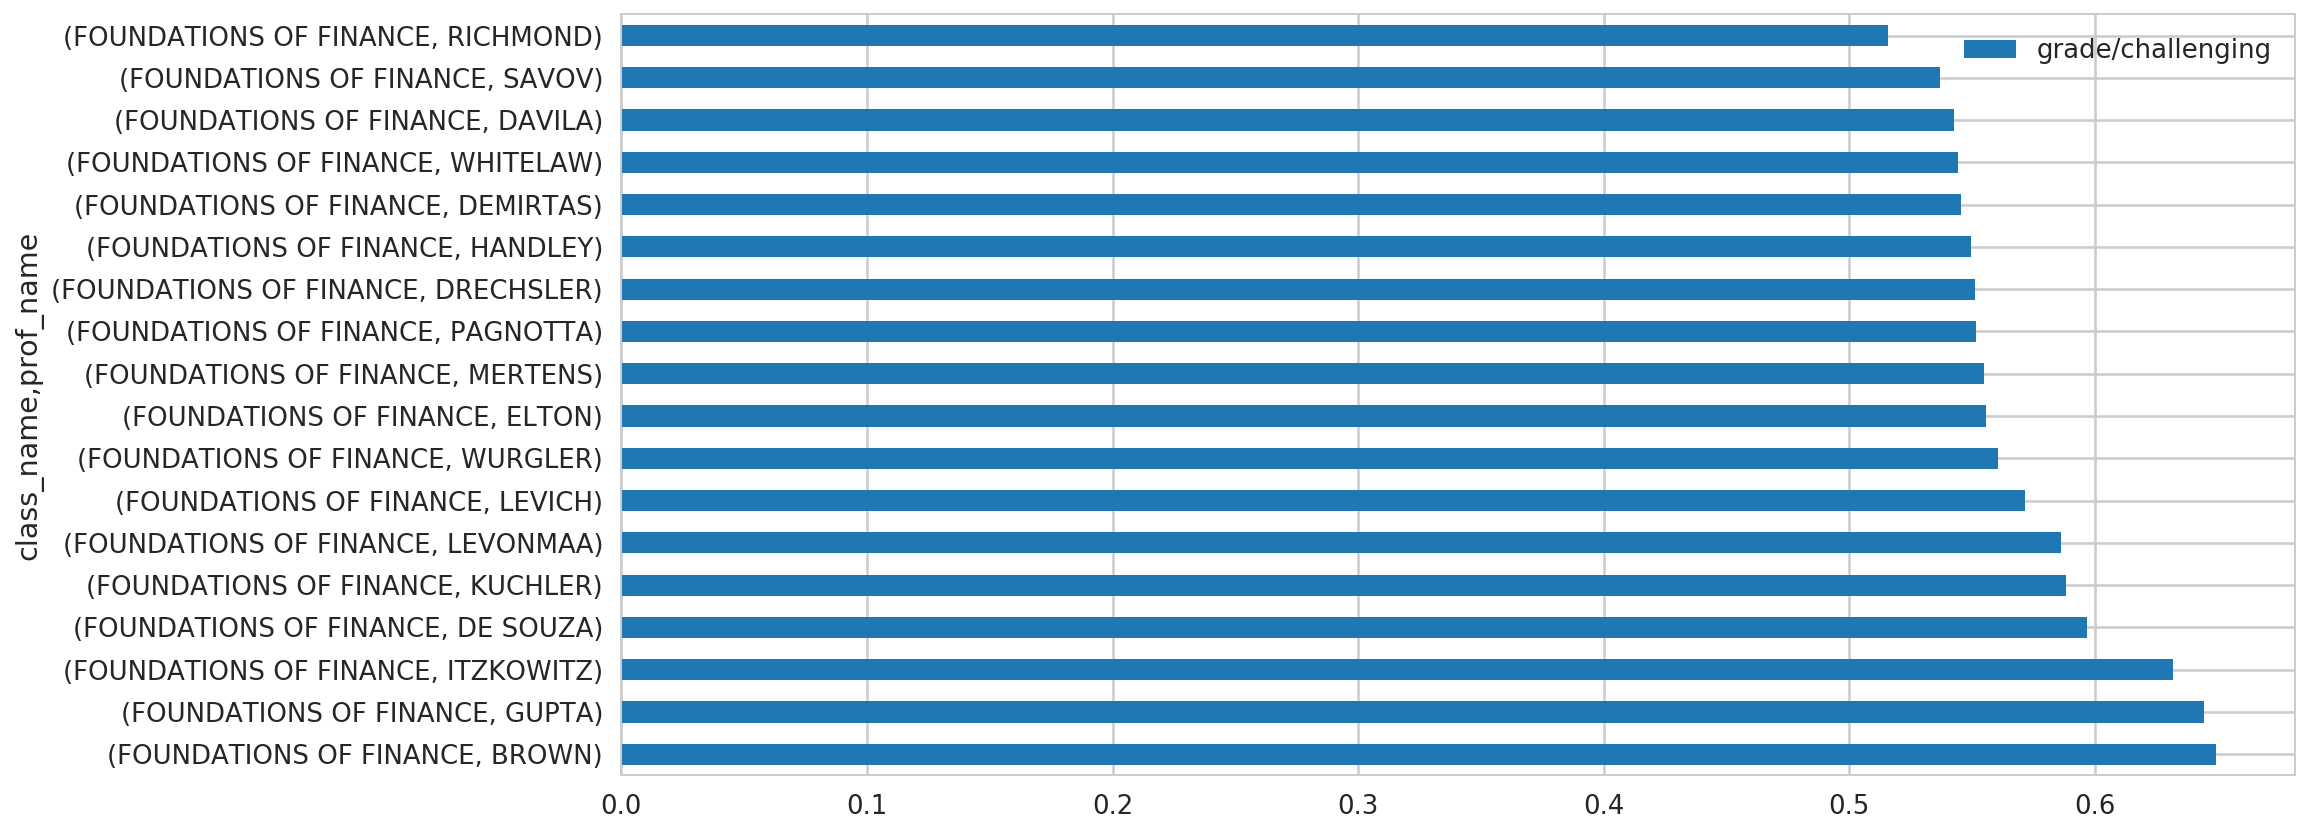

In [13]:
pivot = pd.pivot_table(data = df,
                       index = ['class_name', 'prof_name'],
                       values = 'grade/challenging'
                      )
search = pivot.index.get_level_values('class_name') == "FOUNDATIONS OF FINANCE"
pivot[search].sort_values(by='grade/challenging', ascending=False).plot(kind = 'barh')
#pivot

In [14]:
pivot = pd.pivot_table(data = df,
                      index = 'prof_name',
                      values = ['overall_instructor','demanding'])
pivot.sort_values(by='overall_instructor', ascending=False)

,demanding,overall_instructor
prof_name,,
SZOKE,5.000000,7.000000
WOOD,6.900000,7.000000
MADIA,4.800000,7.000000
WEGHMAN,7.000000,7.000000
NORTH,4.550000,6.950000
SOMERSTEIN,6.633333,6.933333
HANSSEN,6.507692,6.907692
ADAMOPOULOS,4.100000,6.900000
DEMIRTAS,4.700000,6.900000


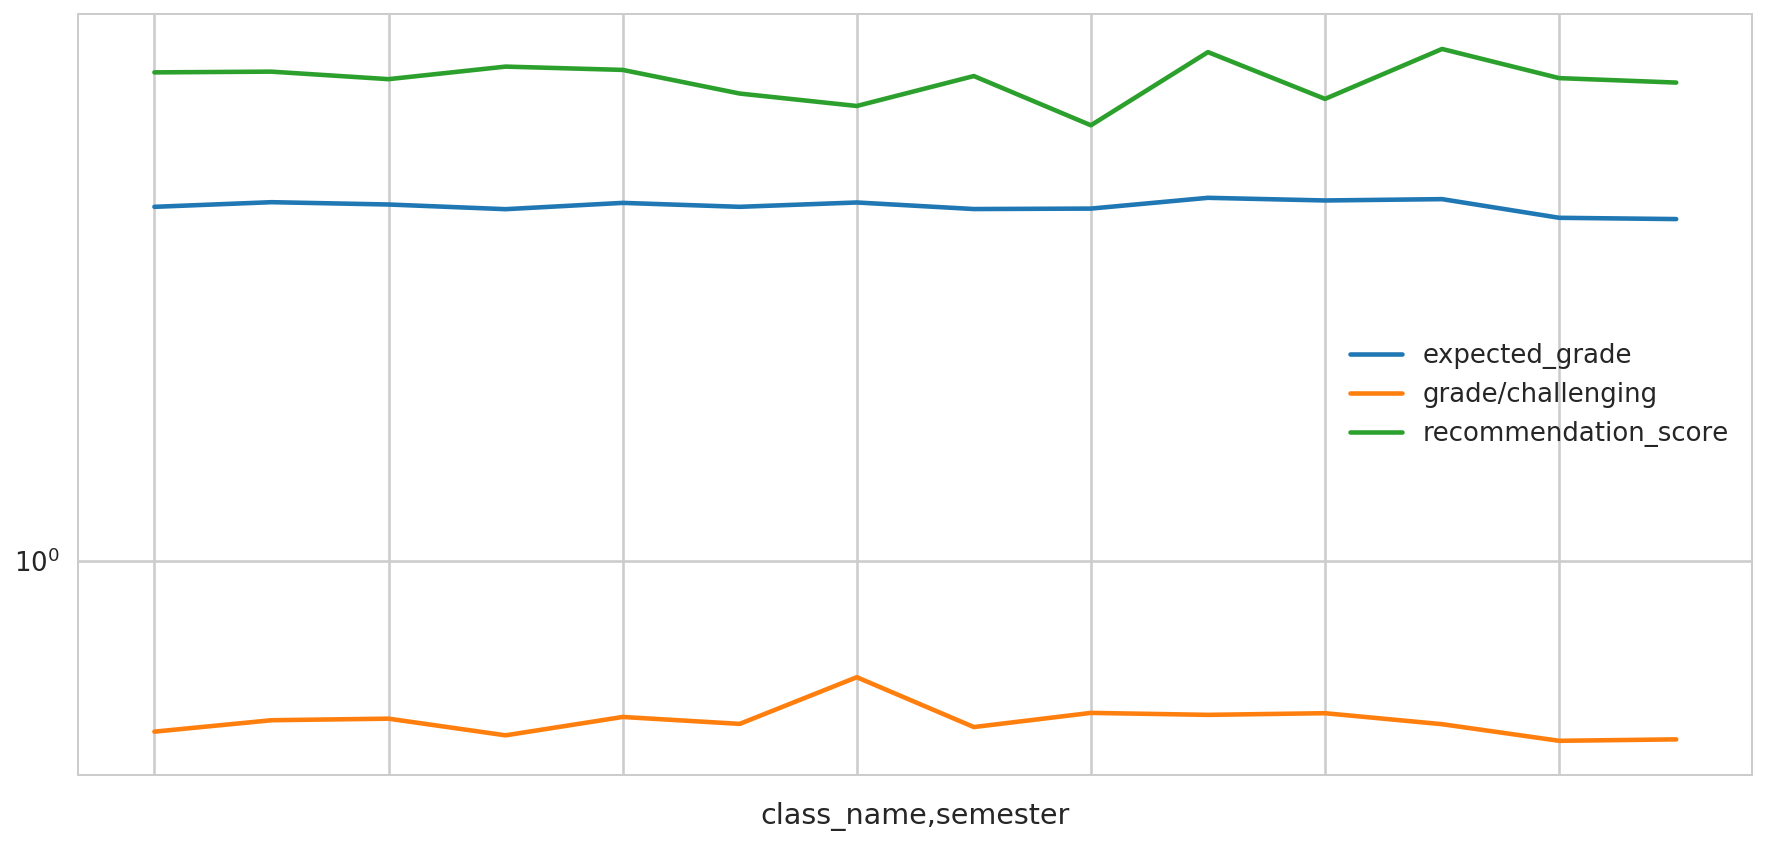

In [15]:
pivot = pd.pivot_table(data = df,
                      index = ['class_name','semester'],
                      values = ['expected_grade','recommendation_score','grade/challenging'])
search = pivot.index.get_level_values('class_name') == "FOUNDATIONS OF FINANCE"
pivot[search].plot(logy = True)

In [16]:
pivot = pd.pivot_table(data = df,
                      index = ['prof_name','semester'],
                      values = ['expected_grade','recommendation_score','grade/challenging'])
search = pivot.index.get_level_values('prof_name') == "IPEIROTIS"
pivot[search]#.plot(logy = True)

expected_grade  grade/challenging  recommendation_score
prof_name semester                                                            
IPEIROTIS 2007 FALL          3.800000           0.666667              6.100000
          2008 FALL          3.800000           0.703602              5.950000
          2009 FALL          3.550000           0.688914              5.300000
          2010 FALL          3.550000           0.732979              4.250000
          2011 FALL          3.633333           0.669096              5.633333
          2014 FALL          4.000000           0.571429              7.000000
          2015 FALL          3.500000           0.522388              6.300000
          2016 FALL          3.666667           0.570126              6.366667
          2016 SPRING        3.800000           0.584615              6.200000
          2017 FALL          3.733333           0.609155              6.333333
          2017 SPRING        3.800000           0.558824              6.600000
          2018 SPRING        3.800000           0.567164              6.300000

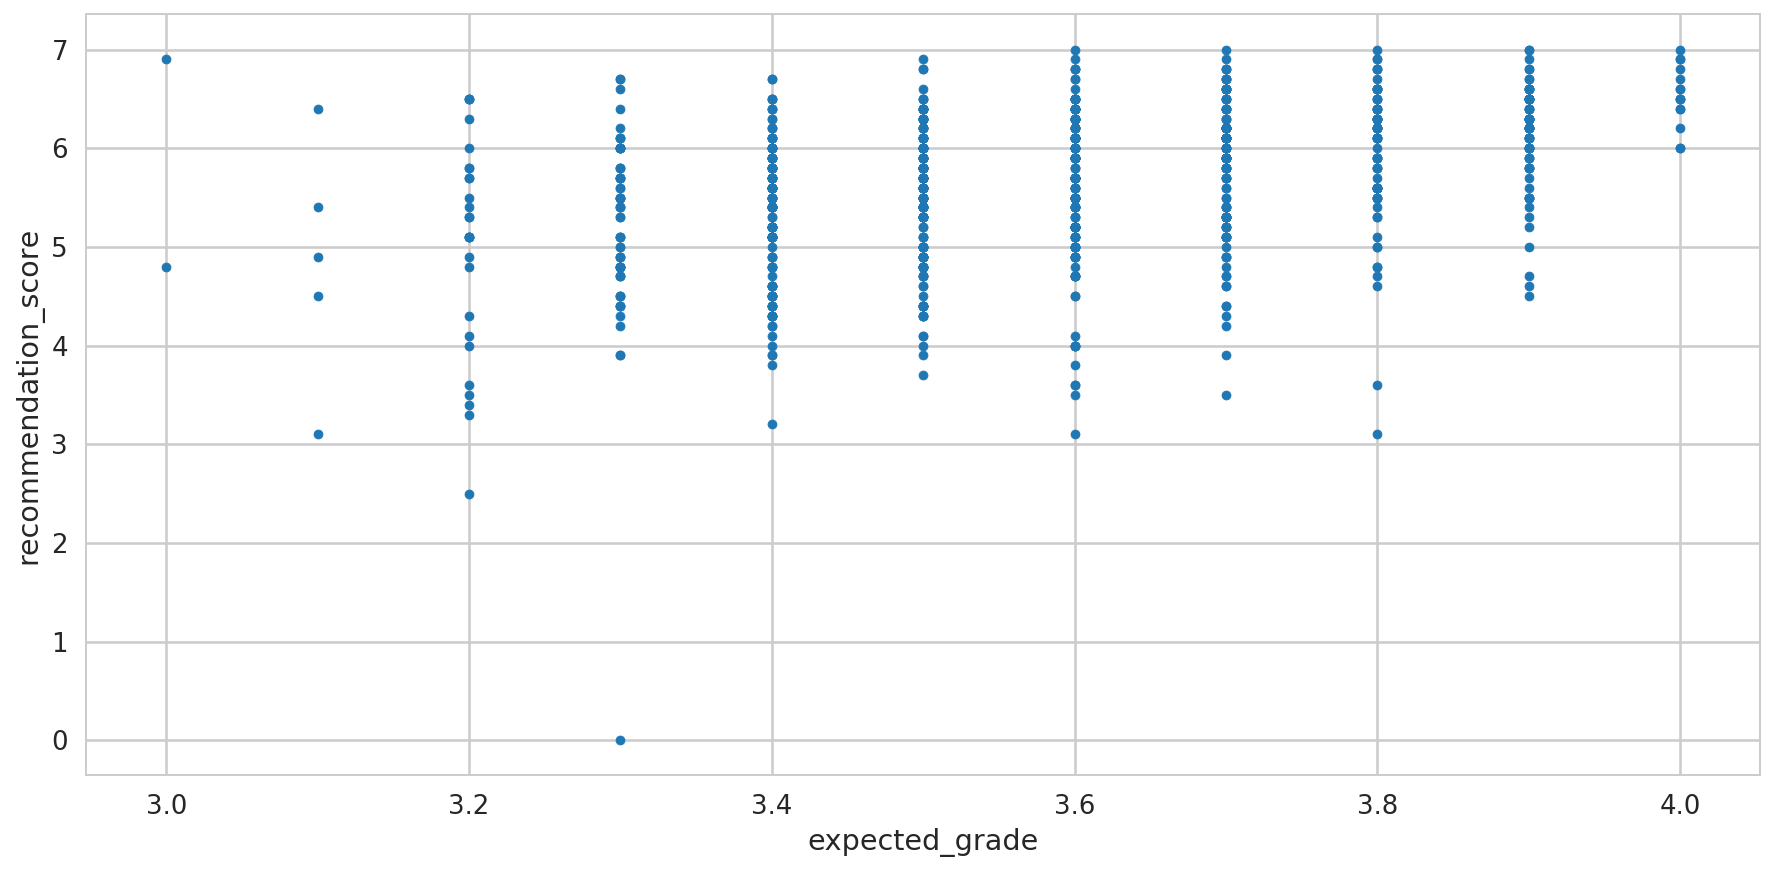

In [17]:
df[(df['expected_grade'] <= 4)].sample(frac = 0.2).plot(x = 'expected_grade', y = 'recommendation_score', kind='scatter')

In [18]:
df[(df['response_rate'] <= 1)].sample(frac=0.2).plot(x = 'response_rate', 
                                    y = 'overall_instructor', 
                                    kind='scatter')

KeyError: 'response_rate'

In [ ]:
import seaborn as sns
sample = df.sample(frac=0.2)
sns.regplot(sample['response_rate'],sample['overall_instructor'])

In [ ]:
query = '''
SELECT `Professor Name`, ROUND(AVG(`Overall Instructor`),2) as AVG_OVERALL
FROM cfe
GROUP BY `Professor Name`
ORDER BY AVG_OVERALL DESC
'''

df = pd.read_sql(query, con=engine)
df.replace('', np.nan, inplace=True)
df.dropna(axis=0, inplace=True)
df

In [ ]:
query = '''
SELECT `Professor Name`, COUNT(`Professor Name`) as num_classes
FROM cfe
GROUP BY `Professor Name`
ORDER BY num_classes DESC
LIMIT 20
'''

df = pd.read_sql(query, con=engine)
df.replace('', np.nan, inplace=True)
df.dropna(axis=0, inplace=True)
pivot = df.pivot_table(index = 'Professor Name')
pivot.plot()

In [ ]:
prof = ['IPEIROTIS', 'FOUDY']
# How to loop?

query = '''
SELECT `Professor Name`, COUNT(`Professor Name`) AS num_classes, ROUND(AVG(`Overall Instructor`),2) AS avg_overall,
ROUND(AVG(`Expected Grade`),2) AS avg_grade, ROUND(AVG(`Demanding`),2) AS avg_demanding
FROM cfe
WHERE `Professor Name` LIKE 'IPEIROTIS'
GROUP BY `Professor Name`
'''

df = pd.read_sql(query, con=engine)
df.replace('', np.nan, inplace=True)
df.dropna(axis=0, inplace=True)
df

In [ ]:
xData = df["expected_grade"]
yData = df["overall_instructor"]
xData = sm.add_constant(xData, prepend=False)
mod = sm.OLS(xData, yData)
res = mod.fit()
print(res)

In [ ]:
result = smf.ols(formula='Communication~Motivation', data=df).fit()
result.summary()

In [ ]:
print(result.summary())